## NLP'de Metin Temsili Yöntemleri

Doğal Dil İşleme (NLP) alanında metin temsili, metin verisinin makine öğrenmesi ve derin öğrenme algoritmaları tarafından işlenebilmesi için sayısal vektörlere dönüştürülmesidir. Metin temsili, modelin metindeki anlamsal ve yapısal bilgiyi öğrenebilmesi açısından kritik öneme sahiptir.

### Temel Metin Temsili Yöntemleri

1. **Bag of Words (BoW)**: Her bir kelimenin metinde kaç kez geçtiğini sayan, sıklık tabanlı ve bağlamdan bağımsız bir yöntemdir. Basit ve hızlıdır, ancak kelime sırasını ve anlamsal ilişkileri göz ardı eder.

2. **TF-IDF (Term Frequency-Inverse Document Frequency)**: Kelimelerin metin içerisindeki önemini belirlemek için kullanılır. Sık geçen ama az belgede bulunan kelimelere daha yüksek ağırlık verir. BoW'a göre daha anlamlı temsiller sunar.

3. **Word Embeddings (Kelime Gömme Yöntemleri)**:
   - **Word2Vec**: Kelimeleri, bağlamlarına göre düşük boyutlu yoğun vektörler olarak temsil eder. Anlamsal benzerlikleri yakalayabilir.
   - **GloVe (Global Vectors for Word Representation)**: Kelimeler arası istatistiksel ilişkileri kullanarak vektörler oluşturur. Büyük veri kümelerinde başarılıdır.
   - **FastText**: Kelimeleri karakter n-gram’larına böler, böylece bilinmeyen kelimeler için de vektör üretebilir.

4. **Cümle ve Paragraf Temsilleri**:
   - **Doc2Vec**: Paragrafları veya belgeleri vektörlere dönüştürür.
   - **Sentence Embeddings**: Universal Sentence Encoder, Sentence-BERT gibi modellerle cümle düzeyinde temsiller elde edilir.

5. **Bağlamsal (Contextual) Temsiller**:
   - **Transformer Tabanlı Modeller (BERT, GPT, RoBERTa, vb.)**: Kelimeleri, bulundukları bağlama göre dinamik olarak vektörleştirir. Anlamsal ve bağlamsal ilişkileri güçlü şekilde yakalar.

### Sonuç
Metin temsili yönteminin seçimi, kullanılacak modelin türüne, veri setinin büyüklüğüne ve çözülmek istenen probleme göre değişir. Modern NLP uygulamalarında bağlamsal ve gömme tabanlı temsiller, klasik yöntemlere göre çok daha başarılı sonuçlar vermektedir.

### 1. Bag of Words (BoW) Yöntemi

**Bag of Words (BoW)**, metin verisini sayısal vektörlere dönüştürmek için kullanılan en temel ve yaygın yöntemlerden biridir. Bu yöntemde, bir metindeki her kelimenin kaç kez geçtiği dikkate alınır ve kelime sırası veya bağlamı göz ardı edilir.

#### Çalışma Prensibi
- Öncelikle, tüm metinlerde geçen benzersiz kelimelerden oluşan bir "kelime sözlüğü" (vocabulary) oluşturulur.
- Her bir metin, bu sözlükteki kelimelerin metinde kaç kez geçtiğini gösteren bir vektör ile temsil edilir.
- Sonuç olarak, her metin için uzunluğu sözlükteki kelime sayısı kadar olan bir sayısal vektör elde edilir.
- BoW yöntemi, kelime sırasını ve grameri dikkate almaz; yalnızca kelime sıklıklarına odaklanır.

**Avantajları:**
- Basit ve hızlıdır.
- Küçük ve orta ölçekli veri setlerinde etkili olabilir.

**Dezavantajları:**
- Kelime sırası ve anlamsal ilişkiler kaybolur.
- Büyük veri setlerinde vektörler çok boyutlu ve seyrek (sparse) hale gelir.

Bir sonraki adımda, BoW yönteminin Python ile nasıl uygulanacağını göstereceğiz.

In [1]:
# Pandas kütüphanesini veri analizi ve veri çerçevesi (DataFrame) işlemleri için yüklüyoruz.
import pandas as pd

# scikit-learn kütüphanesinden CountVectorizer sınıfını, BoW (Bag of Words) yöntemiyle metni vektörleştirmek için yüklüyoruz.
from sklearn.feature_extraction.text import CountVectorizer

# nltk (Natural Language Toolkit) kütüphanesini doğal dil işleme işlemleri için yüklüyoruz.
import nltk

# nltk'nin stopwords (dilsel gereksiz kelimeler) veri setini indiriyoruz. Bu, metin temizleme aşamasında gereksiz kelimeleri çıkarmak için kullanılır.
nltk.download('stopwords')

# nltk kütüphanesinden Türkçe veya İngilizce stopwords listesini kullanmak için stopwords modülünü yüklüyoruz.
from nltk.corpus import stopwords

# re (regular expressions) modülünü, metinlerde desen arama ve temizleme işlemleri için yüklüyoruz.
import re

# collections modülünden Counter sınıfını, kelime frekanslarını saymak için yüklüyoruz.
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cemal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# IMDB film yorumları veri setini okuyoruz.
# Dosya yolunu kendi çalışma dizinimize göre belirtiyoruz.
df_film = pd.read_csv("IMDB Dataset.csv")

# Veri setinin ilk 5 satırını görüntüleyerek veri yapısını ve sütunları inceliyoruz.
df_film.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# Veri setinin son 5 satırını da görüntüleyerek veri yapısını ve sütunları inceliyoruz.
df_film.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [4]:
df_film.shape   # Veri setinin satır ve sütun sayısını kontrol ediyoruz.

(50000, 2)

In [5]:
df_film["sentiment"].value_counts()  # 'sentiment' sütunundaki olumlu ve olumsuz yorum sayısını kontrol ediyoruz.

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [6]:
metin = df_film["review"]
label = df_film["sentiment"]

In [7]:
not_clean_text = " ".join(metin.astype(str))  # Tüm yorumları tek bir metin haline getiriyoruz.
not_clean_text[:500]  # Metnin ilk 500 karakterini görüntülüyoruz.

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ"

In [8]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def metin_on_isleme(text):
    # Metni küçük harfe dönüştürerek standardizasyon sağlarız.
    text = text.lower()

    # HTML etiketlerini (özellikle <br>, <br/>, <br /> gibi) temizleriz.
    text = re.sub(r'<.*?>', ' ', text)

    # Alt çizgileri boşlukla değiştiririz.
    text = text.replace('_', ' ')

    # Sayıları metinden çıkarırız.
    text = re.sub(r'[0-9]', '', text)

    # Noktalama işaretlerini ve özel karakterleri metinden temizleriz.
    text = re.sub(r'[^\w\s]', '', text)

    # İngilizce dilindeki yaygın ve anlamsız kelimeleri (stop words) çıkarırız.
    stop_words = set(stopwords.words('english'))

    # Metni kelimelere ayırırız (tokenization).
    kelimeler = word_tokenize(text)

    # Her kelimeyi kontrol ederek, stop words listesinde olmayanları yeni bir listeye ekleriz.
    kelimeler = [kelime for kelime in kelimeler if kelime not in stop_words]

    # Temizlenmiş kelimeleri tekrar birleştirerek tek bir metin dizesi oluştururuz.
    text = " ".join(kelimeler)

    return text

# Her bir metin üzerinde ön işleme fonksiyonunu uygularız.
cleaned_text = [metin_on_isleme(row) for row in metin]

# Sonucu ekrana bastırırız.
cleaned_text[:100]

['one reviewers mentioned watching oz episode youll hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle class inma

In [9]:
# Metin temsili için vectorizer tanımlayalım:
vectorizer = CountVectorizer()

# metni sayısal temsillere çevirelim:
X = vectorizer.fit_transform(cleaned_text)
X
# (50.000, 162.354) -> 50.000 satır, 162.354 unique kelime varmış

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4925742 stored elements and shape (50000, 162354)>

In [10]:
# Kelime kümesine bakalım:
kelimeler = vectorizer.get_feature_names_out()
kelimeler[:300]

array(['aa', 'aaa', 'aaaaaaaaaaaahhhhhhhhhhhhhh', 'aaaaaaaargh',
       'aaaaaaah', 'aaaaaaahhhhhhggg', 'aaaaagh', 'aaaaah', 'aaaaargh',
       'aaaaarrrrrrgggggghhhhhh', 'aaaaatchkah', 'aaaaaw', 'aaaahhhhhh',
       'aaaahhhhhhh', 'aaaand', 'aaaarrgh', 'aaaawwwwww', 'aaaggghhhhhhh',
       'aaagh', 'aaah', 'aaahhhhhhh', 'aaahthe', 'aaall', 'aaand',
       'aaargh', 'aaarrrghim', 'aaaugh', 'aab', 'aachen', 'aada', 'aadha',
       'aadmittedly', 'aag', 'aage', 'aagh', 'aaghh', 'aah', 'aahed',
       'aahemy', 'aahhh', 'aahhhh', 'aahing', 'aaila', 'aailiyah', 'aaip',
       'aaja', 'aajala', 'aak', 'aakash', 'aake', 'aaker', 'aakrosh',
       'aalcc', 'aaliyah', 'aaliyahs', 'aalox', 'aames', 'aamess',
       'aamilne', 'aamir', 'aamirs', 'aamirsalmanraveenakarishma', 'aamr',
       'aan', 'aankh', 'aankhen', 'aaoon', 'aap', 'aapke', 'aapkey',
       'aaran', 'aardman', 'aardmans', 'aardvark', 'aardvarks', 'aarf',
       'aargh', 'aarghlets', 'aarika', 'aaron', 'aaroncurb', 'aaronjd',
   

In [11]:
# Vektör temsili DataFrame'in tamamını belleğe almak çok fazla RAM gerektirir.
# Bunun yerine, sadece ilk 1000 satırı DataFrame olarak gösterelim:
metin_bow_preview = pd.DataFrame(X[:1000].toarray(), columns=kelimeler)
metin_bow_preview

,aa,aaa,aaaaaaaaaaaahhhhhhhhhhhhhh,aaaaaaaargh,aaaaaaah,aaaaaaahhhhhhggg,aaaaagh,aaaaah,aaaaargh,aaaaarrrrrrgggggghhhhhh,...,überwoman,ünel,ünfaithful,üvegtigris,üzümcü,ýs,þorleifsson,þór,יגאל,כרמון
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Kelimelerin toplam frekanslarını bulmak için:

kelime_frekanslari = metin_bow_preview.sum(axis=0).sort_values(ascending=False)
kelime_frekanslari

movie           1730
film            1500
one              968
like             773
good             526
                ... 
aaaahhhhhhh        0
aaaand             0
aaaarrgh           0
aaaawwwwww         0
überannoying       0
Length: 162354, dtype: int64

In [13]:
# ilk 10 kelimeye bakalım:
most_common = kelime_frekanslari.head(10)
most_common

movie     1730
film      1500
one        968
like       773
good       526
even       516
see        514
would      490
really     451
story      448
dtype: int64

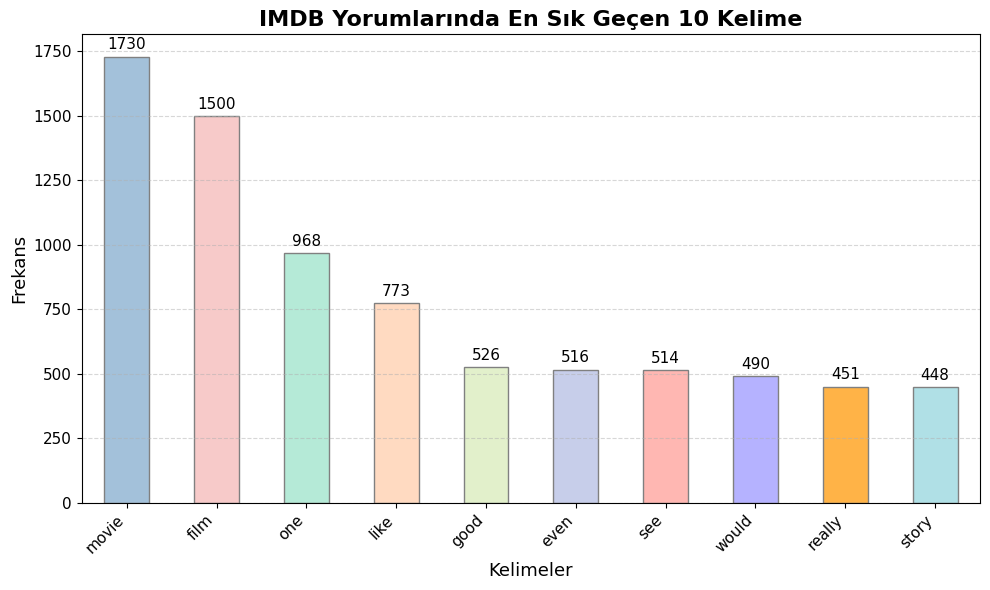

In [14]:
# En sık geçen 10 kelimenin frekanslarını pastel tonlarda ve profesyonel bir şekilde görselleştiriyoruz.

import matplotlib.pyplot as plt

# Pastel renk paleti tanımlanıyor.
pastel_colors = ["#A3C1DA", "#F7CAC9", "#B5EAD7", "#FFDAC1", "#E2F0CB", "#C7CEEA", "#FFB7B2", "#B5B2FF", "#FFB347", "#B0E0E6"]

plt.figure(figsize=(10, 6))  # Görsel boyutunu ayarlıyoruz.

# Bar grafiği oluşturuluyor.
kelime_frekanslari.head(10).plot(
    kind="bar",
    color=pastel_colors,
    edgecolor="gray"
)

plt.title("IMDB Yorumlarında En Sık Geçen 10 Kelime", fontsize=16, fontweight="bold")
plt.xlabel("Kelimeler", fontsize=13)
plt.ylabel("Frekans", fontsize=13)
plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()  # Grafik elemanlarının taşmamasını sağlar.

# Grafik üzerine değer etiketleri ekleniyor.
for i, v in enumerate(kelime_frekanslari.head(10)):
    plt.text(i, v + max(kelime_frekanslari.head(10)) * 0.01, str(int(v)), ha='center', va='bottom', fontsize=11)

plt.show()

## TF-IDF (Term Frequency-Inverse Document Frequency)

TF-IDF, Doğal Dil İşleme (NLP) alanında metin verilerini analiz etmek ve önemli kelimeleri belirlemek için kullanılan güçlü bir yöntemdir. Bu yöntem, bir kelimenin bir belgede ne kadar önemli olduğunu hesaplar. Kelimenin sıklığı (TF) ve nadirliği (IDF) dikkate alınarak yapılır. Hiç matematik bilmeyen biri bile anlayacak şekilde adım adım açıklayalım.

### Temel Kavramlar
- **Belge (Document)**: Bir metin parçası, örneğin bir makale, yorum veya kitap bölümü.
- **Kelime (Term)**: Metindeki tek tek kelimeler.
- **Korpus (Corpus)**: Tüm belgelerin topluluğu.

### TF (Term Frequency) - Kelime Sıklığı
TF, bir kelimenin belirli bir belgede ne kadar sık geçtiğini ölçer. Basitçe, "Bu kelime bu belgede kaç kez var?" sorusuna cevap verir.

**Formül:**
```
TF(t, d) = (t kelimesinin d belgesindeki sayısı) / (d belgesindeki toplam kelime sayısı)
```

**Örnek:**
Diyelim ki bir belgede 100 kelime var ve "köpek" kelimesi 5 kez geçiyor.
- TF("köpek", belge) = 5 / 100 = 0.05

Bu, "köpek" kelimesinin belgenin %5'ini oluşturduğunu gösterir. Eğer kelime çok sık geçerse TF yüksek olur.

### IDF (Inverse Document Frequency) - Ters Belge Sıklığı
IDF, bir kelimenin tüm korpusta ne kadar nadir olduğunu ölçer. Yaygın kelimeler (örneğin "ve", "bir") düşük IDF'ye sahip olurken, nadir kelimeler yüksek IDF'ye sahip olur.

**Formül:**
```
IDF(t) = log(N / DF(t))
```
- N: Toplam belge sayısı.
- DF(t): t kelimesini içeren belge sayısı.
- log: Logaritma fonksiyonu (basitçe, sayıları küçültmek için kullanılır).

**Örnek:**
Diyelim ki toplam 1000 belge var ve "köpek" kelimesi 10 belgede geçiyor.
- DF("köpek") = 10
- IDF("köpek") = log(1000 / 10) = log(100) ≈ 2

Eğer kelime çok nadir ise (örneğin sadece 1 belgede geçiyor), IDF yüksek olur: log(1000 / 1) = log(1000) ≈ 3.

### TF-IDF Hesaplaması
TF-IDF, TF ve IDF'nin çarpımıdır. Bu, bir kelimenin belgede önemli olup olmadığını belirler:
- Yüksek TF: Kelime belgede sık geçiyor.
- Yüksek IDF: Kelime nadir, yani özel.
- Yüksek TF-IDF: Kelime hem sık hem de nadir, yani önemli!

**Formül:**
```
TF-IDF(t, d) = TF(t, d) * IDF(t)
```

**Örnek:**
Yukarıdaki örnekte:
- TF("köpek", belge) = 0.05
- IDF("köpek") = 2
- TF-IDF("köpek", belge) = 0.05 * 2 = 0.1

Bu değer, kelimenin önemini gösterir. Daha yüksek değer, daha önemli kelime demektir.

### Çalışma Mantığı Adım Adım
1. **Veri Hazırlığı:** Tüm belgeleri topla ve kelimelere ayır.
2. **TF Hesapla:** Her kelime için her belgede TF'yi hesapla.
3. **IDF Hesapla:** Her kelime için IDF'yi hesapla.
4. **TF-IDF Hesapla:** TF ve IDF'yi çarp.
5. **Önem Sıralaması:** Yüksek TF-IDF'li kelimeler en önemli olanlardır.

**Basit Analoji:**
Düşün ki bir kitap koleksiyonun var. "Köpek" kelimesi bir kitapta sık geçiyor ama diğer kitaplarda nadir. Bu, "köpek" kelimesinin o kitap için önemli olduğunu gösterir. Ama "ve" kelimesi her kitapta sık geçiyor, yani önemli değil.

### Avantajlar
- Yaygın kelimeleri (stop words) önemsiz kılar.
- Nadir ama önemli kelimeleri öne çıkarır.
- Arama motorları ve metin sınıflandırma için mükemmeldir.

### Dezavantajlar
- Büyük veri setlerinde hesaplama maliyeti yüksek olabilir.
- Kelime sırası ve bağlamı dikkate almaz (BoW gibi).

Bu yöntem, metin madenciliği ve NLP'de temel bir araçtır. Daha gelişmiş modeller (örneğin BERT) için de temel oluşturur.

In [16]:
# TF-IDF (Term Frequency-Inverse Document Frequency) yöntemini uygulamak için TfidfVectorizer sınıfını scikit-learn'den import ediyoruz.

from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
# Örnek belgeler tanımlıyoruz.
doc1 = "sun is a planet"
doc2 = "sun is a star"

# Belgeleri bir liste olarak topluyoruz.
doc_corpus = [doc1, doc2]

# TF-IDF vektörleştiriciyi normalize edilmemiş olarak tanımlıyoruz.
vectorizer = TfidfVectorizer(norm=None)

# Belgeleri TF-IDF matrisine dönüştürüyoruz.
matrix = vectorizer.fit_transform(doc_corpus)

# Kelime adlarını alıyoruz.
feature_names = vectorizer.get_feature_names_out()

# IDF değerlerini alıyoruz.
idf_values = vectorizer.idf_

# Kelime ve IDF değerlerini sözlük olarak eşleştiriyoruz.
idf_dict = dict(zip(feature_names, idf_values))

# IDF değerlerini yazdırıyoruz.
print("IDF Değerleri:")
for word, idf in idf_dict.items():
    print(f"{word}: {idf:.4f}")

# TF-IDF değerlerini yazdırıyoruz.
print("\nTF-IDF Değerleri (her belge için, normalize edilmemiş):")

# TF-IDF matrisini DataFrame'e dönüştürüyoruz.
tfidf_df = pd.DataFrame(matrix.toarray(), columns=feature_names)
print(tfidf_df.round(4))

IDF Değerleri:
is: 1.0000
planet: 1.4055
star: 1.4055
sun: 1.0000

TF-IDF Değerleri (her belge için, normalize edilmemiş):
    is  planet    star  sun
0  1.0  1.4055  0.0000  1.0
1  1.0  0.0000  1.4055  1.0


In [19]:
cleaned_text # Temizlenmiş metinleri görüntülüyoruz.

['one reviewers mentioned watching oz episode youll hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle class inma

In [20]:
# TF-IDF vektörleştiriciyi varsayılan ayarlarla tanımlıyoruz.
vectorizer = TfidfVectorizer()

# Temizlenmiş metinleri TF-IDF matrisine dönüştürüyoruz.
X = vectorizer.fit_transform(cleaned_text)

# Elde edilen TF-IDF matrisini görüntülüyoruz.
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4925742 stored elements and shape (50000, 162354)>

In [21]:
# kelime kümesine bakalım:
kelime_kumesi = vectorizer.get_feature_names_out()
kelime_kumesi

array(['aa', 'aaa', 'aaaaaaaaaaaahhhhhhhhhhhhhh', ..., 'þór', 'יגאל',
       'כרמון'], shape=(162354,), dtype=object)

In [40]:
# TF-IDF matrisini tablo haline getir (bellek hatası önlemek için sadece ilk 40000 satır ve ilk 10 sütun göster)
tfidf_df = pd.DataFrame(X[:40000].toarray()[:, :10], columns=kelime_kumesi[:10])
print(tfidf_df.round(4))

        aa  aaa  aaaaaaaaaaaahhhhhhhhhhhhhh  aaaaaaaargh  aaaaaaah  \
0      0.0  0.0                         0.0          0.0       0.0   
1      0.0  0.0                         0.0          0.0       0.0   
2      0.0  0.0                         0.0          0.0       0.0   
3      0.0  0.0                         0.0          0.0       0.0   
4      0.0  0.0                         0.0          0.0       0.0   
...    ...  ...                         ...          ...       ...   
39995  0.0  0.0                         0.0          0.0       0.0   
39996  0.0  0.0                         0.0          0.0       0.0   
39997  0.0  0.0                         0.0          0.0       0.0   
39998  0.0  0.0                         0.0          0.0       0.0   
39999  0.0  0.0                         0.0          0.0       0.0   

       aaaaaaahhhhhhggg  aaaaagh  aaaaah  aaaaargh  aaaaarrrrrrgggggghhhhhh  
0                   0.0      0.0     0.0       0.0                      0.0  
1  

In [42]:
# Her kelimenin toplam TF-IDF skorunu hesaplayalım:
toplam_tfidf = tfidf_df.sum(axis=0)

# En yüksek 10 kelimeyi sıralayalım
en_yuksek_10 = toplam_tfidf.sort_values(ascending=False).head(10)

# Yeni bir DataFrame oluşturalım:
en_yuksek_10_df = pd.DataFrame({
    "kelime": en_yuksek_10.index,
    "toplam_tfidf": en_yuksek_10.values
})

print(en_yuksek_10_df)


                       kelime  toplam_tfidf
0                          aa      2.138726
1                         aaa      1.376300
2                 aaaaaaaargh      0.316650
3                     aaaaagh      0.280667
4            aaaaaaahhhhhhggg      0.280135
5     aaaaarrrrrrgggggghhhhhh      0.229223
6  aaaaaaaaaaaahhhhhhhhhhhhhh      0.202727
7                      aaaaah      0.038885
8                    aaaaaaah      0.000000
9                    aaaaargh      0.000000


## N-Gram Yöntemi

N-Gram, Doğal Dil İşleme (NLP) alanında metin verilerini analiz etmek ve anlamlı kelime gruplarını yakalamak için kullanılan bir yöntemdir. Bu yöntem, metindeki kelimelerin veya karakterlerin ardışık gruplarını (n-gram'lar) oluşturarak bağlamı ve anlamı daha iyi yakalar. N-Gramlar, BoW veya TF-IDF gibi yöntemlerle birlikte kullanılarak metin temsillerini zenginleştirir.

### Temel Kavramlar
- **N-Gram**: Metindeki ardışık n adet kelime veya karakter grubu.
- **Unigram (1-Gram)**: Tek kelime (örneğin, "merhaba").
- **Bigram (2-Gram)**: İki ardışık kelime (örneğin, "merhaba dünya").
- **Trigram (3-Gram)**: Üç ardışık kelime (örneğin, "merhaba dünya nasılsın").
- **Korpus (Corpus)**: Tüm metinlerin topluluğu.

### Çalışma Prensibi
1. **Metni Hazırla:** Metni kelimelere ayır (tokenization).
2. **N-Gram Oluştur:** Ardışık n adet kelimeyi gruplandır.
3. **Frekans Hesapla:** Her n-gram'ın kaç kez geçtiğini say.
4. **Temsil Et:** N-gram'ları vektör olarak kullan (örneğin, BoW benzeri).

**Örnek:**
Metin: "Doğal dil işleme çok eğlenceli"

- Unigram: ["Doğal", "dil", "işleme", "çok", "eğlenceli"]
- Bigram: ["Doğal dil", "dil işleme", "işleme çok", "çok eğlenceli"]
- Trigram: ["Doğal dil işleme", "dil işleme çok", "işleme çok eğlenceli"]

### Avantajlar
- Kelime sırasını ve bağlamı yakalar (BoW'dan daha iyi).
- Anlamlı ifadeleri (örneğin, "yapay zeka") tespit eder.
- Metin sınıflandırma ve dil modeli oluşturmada kullanılır.

### Dezavantajlar
- Büyük n değerleri için vektör boyutu artar (seyrek matris).
- Nadir n-gram'lar için overfitting riski.
- Hesaplama maliyeti yüksek olabilir.

### Kullanım Alanları
- Metin sınıflandırma (sentiment analysis).
- Dil modeli oluşturma (örneğin, GPT modelleri).
- Yazım düzeltme ve öneri sistemleri.

Bu yöntem, NLP'de temel bir araçtır ve modern modellerde (örneğin, BERT) n-gram benzeri yapılar kullanılır.

In [43]:
from sklearn.feature_extraction.text import CountVectorizer    

In [46]:
# Temizlenmiş metnimizden küçük bir gözlem alalım (örnek olarak ilk 10 metni gösterelim).

# Listeyi pandas Series'e çevir (daha kolay manipülasyon ve görüntüleme için).
series = pd.Series(cleaned_text)

# İlk 10 metni alalım (unigram analizi için örnek veri hazırlamak amacıyla).
uni_df = series.head(10)
uni_df

0    one reviewers mentioned watching oz episode yo...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically theres family little boy jake thinks...
4    petter matteis love time money visually stunni...
5    probably alltime favorite movie story selfless...
6    sure would like see resurrection dated seahunt...
7    show amazing fresh innovative idea first aired...
8    encouraged positive comments film looking forw...
9    like original gut wrenching laughter like movi...
dtype: object

In [47]:
# uni_df'i liste olarak göster (örnek metinleri daha kolay incelemek için).
uni_df.tolist()

['one reviewers mentioned watching oz episode youll hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle class inma

In [48]:
# unigram, bigram, trigram modelleri (farklı n-gram türlerini test etmek için).
vectorizer_unigram = CountVectorizer(ngram_range=(1,1))
vectorizer_bigram = CountVectorizer(ngram_range=(2,2))
vectorizer_trigram = CountVectorizer(ngram_range=(3,3))

In [49]:
# unigram (tek kelime grupları için vektörleştirme yapalım).
X_unigram = vectorizer_unigram.fit_transform(uni_df)

# unigram özelliklerini alalım.
unigram_features = vectorizer_unigram.get_feature_names_out()

# unigram özelliklerini gösterelim.
unigram_features

array(['accustomed', 'acting', 'action', 'actors', 'addiction', 'adrian',
       'adventureoh', 'agenda', 'agreements', 'air', 'aired', 'alive',
       'allen', 'alltime', 'almost', 'also', 'amazing', 'another',
       'anxiously', 'anymore', 'appeal', 'arguing', 'around', 'arthur',
       'audiences', 'average', 'await', 'awakening', 'away', 'awful',
       'back', 'bad', 'band', 'basically', 'become', 'believable',
       'believe', 'best', 'bette', 'big', 'bit', 'bitches', 'black',
       'boogeyman', 'boring', 'boy', 'bread', 'brilliance', 'brilliant',
       'bring', 'brings', 'brutality', 'buscemi', 'called', 'camp',
       'cant', 'career', 'carol', 'case', 'cast', 'cause', 'cells',
       'change', 'characters', 'charm', 'cheap', 'children', 'chose',
       'chosen', 'christians', 'city', 'class', 'classic', 'closet',
       'come', 'comeback', 'comedies', 'comedy', 'comes', 'comfortable',
       'comforting', 'comments', 'complete', 'concerning', 'conditioned',
       'connect

In [50]:
# DataFrame’e aktar
df = pd.DataFrame(X_unigram.toarray(), columns=unigram_features)
print(df)

   accustomed  acting  action  actors  addiction  adrian  adventureoh  agenda  \
0           1       0       0       0          0       0            0       1   
1           0       0       0       1          0       0            0       0   
2           0       0       0       0          1       0            0       0   
3           0       0       0       0          0       0            0       0   
4           0       1       1       0          0       1            0       0   
5           0       0       0       0          0       0            0       0   
6           0       0       0       0          0       0            1       0   
7           0       0       0       0          0       0            0       0   
8           0       1       0       0          0       0            0       0   
9           0       0       0       0          0       0            0       0   

   agreements  air  ...  wouldnt  wrenching  writing  written  years  york  \
0           1    0  ...       

In [51]:
# bigram:
X_bigram = vectorizer_bigram.fit_transform(uni_df)
bigram_features = vectorizer_bigram.get_feature_names_out()
bigram_features

array(['accustomed high', 'acting good', 'acting soundtrack',
       'action present', 'actors extremely', 'addiction thought',
       'adrian grenier', 'adventureoh way', 'agenda em',
       'agreements never', 'air conditioned', 'air find', 'aired first',
       'alive wish', 'allen still', 'alltime favorite', 'almost bad',
       'almost every', 'also chose', 'amazing fresh', 'another next',
       'anxiously next', 'anymore continued', 'appeal show',
       'arguing like', 'around first', 'arthur schnitzlers',
       'audiences forget', 'average spirited', 'await anxiously',
       'awakening whats', 'away well', 'away would', 'awful almost',
       'awful cant', 'back kid', 'bad mildly', 'bad mistake',
       'bad performances', 'band hacks', 'basically theres',
       'become comfortable', 'become rambo', 'believable startling',
       'believe creator', 'believe ive', 'believe still',
       'best performance', 'best place', 'bette davis', 'big city',
       'bit effort', 'bitch

In [52]:
# DataFrame’e aktar
df = pd.DataFrame(X_bigram.toarray(), columns=bigram_features)
print(df)

   accustomed high  acting good  acting soundtrack  action present  \
0                1            0                  0               0   
1                0            0                  0               0   
2                0            0                  0               0   
3                0            0                  0               0   
4                0            1                  0               1   
5                0            0                  0               0   
6                0            0                  0               0   
7                0            0                  0               0   
8                0            0                  1               0   
9                0            0                  0               0   

   actors extremely  addiction thought  adrian grenier  adventureoh way  \
0                 0                  0               0                0   
1                 1                  0               0                0   
2   

In [54]:
# trigram:
X_trigram = vectorizer_trigram.fit_transform(uni_df)
trigram_features = vectorizer_trigram.get_feature_names_out()
trigram_features

# DataFrame’e aktar
df = pd.DataFrame(X_trigram.toarray(), columns=trigram_features)
print(df)

   accustomed high levels  acting good mr  acting soundtrack films  \
0                       1               0                        0   
1                       0               0                        0   
2                       0               0                        0   
3                       0               0                        0   
4                       0               1                        0   
5                       0               0                        0   
6                       0               0                        0   
7                       0               0                        0   
8                       0               0                        1   
9                       0               0                        0   

   action present time  actors extremely well  addiction thought proof  \
0                    0                      0                        0   
1                    0                      1                        0   
2      